# Analysis

Analysis of results from `model_comparison.ipynb`.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import numpy as np

In [37]:
# Helper functions

def mean_std(df, column:str):
    """Get mean and upper/lower bounds of variance"""
    mean = df[column].mean()
    std = df[column].std()
    return mean, std

def plot(models: list, metric: str, experiment_suffix: str):
    """Plot comparison of results for each model by given metric"""
    
    cols = len(models)
    f, axes = plt.subplots(1, cols, sharey=True, figsize=(15, 8))
    minorLocator = AutoMinorLocator()
    
    for i in range(cols):
        model_name = f'{models[i][0]}'
        df = pd.read_csv(f'{results_pth}/{model_name}_{experiment_suffix}.csv')
        mean, std = mean_std(df, metric)
        axes[i].set_title(models[i][1])
        axes[i].plot(list(df.index), list(df[metric]))
        axes[i].axhline(y=mean, color='r')
        axes[i].axhline(y=mean+std, linestyle='--', color='g')
        axes[i].axhline(y=mean-std, linestyle='--', color='g')
        axes[i].set_xlabel('iteration')
        axes[i].yaxis.set_major_locator(plt.MaxNLocator(20))
        axes[i].yaxis.set_minor_locator(minorLocator)
        axes[i].tick_params(which='major', length=6)
        if i ==0:
            axes[i].set_ylabel(metric)
    return plt

In [38]:
# Config
results_pth = './results'
assets_pth = './assets'

# Filename prefixes used when looking up results
models = [
    ['unet_baseline', 'unet'],
    ['unet_baseline_upsampled', 'unet_upsampled'],
    ['unet_ternaus_nopre', 'ternaus_nopre'],
    ['unet_ternaus', 'ternaus'],
    ['unet_ternaus_drop', 'ternaus_drop'],
    ['unet_ternaus_bn', 'ternaus_bn'],
    ['unet_ternaus_dropbn', 'ternaus_dropbn'],
    ['unet_pix2pix', 'pix2pix_generator']
]

# Experiment A – Analysis 

Baseline U-net model trained on 512px images until overfitting

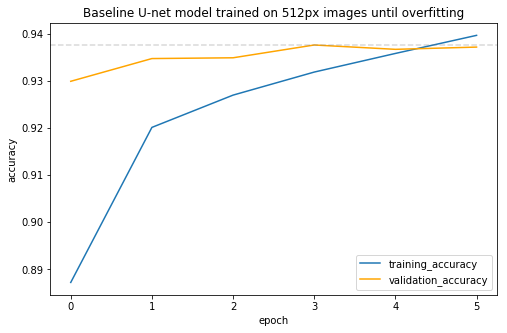

In [6]:
df = pd.read_csv(f'{results_pth}/unet_baseline_512px_500steps_10epochs.csv')
df = df.rename(index=str, columns={"acc": "training_accuracy", 
                                   "val_acc": "validation_accuracy"})
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['training_accuracy'])
plt.plot(df['epoch'], df['validation_accuracy'], color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.axhline(df['validation_accuracy'].max(), linestyle='--', color='gray',
            alpha=0.3)
plt.legend()
plt.title('Baseline U-net model trained on 512px images until overfitting')
plt.savefig(f'{assets_pth}/unet_baseline_512px_500steps_10epochs.jpg',
            format='jpg', quality=90)
plt.show();

In [10]:
# Max validation pixel accuracy
df['validation_accuracy'].max()

0.9375780296325684

# Experiment B – Analysis

## Slow test – 20 epochs each of 250 training steps

Comparison of validation set accuracy for each model after 20 epochs x 250 training steps. Each experiment is repeated for 20 iterations to allow estimate of mean and variance of model performance.

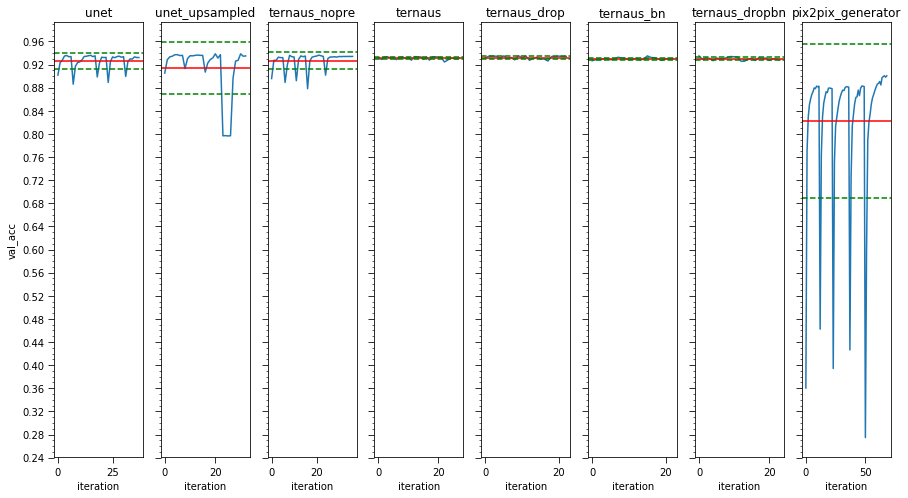

In [39]:
plt = plot(models, 'val_acc', '256px_250steps_20epochs')
plt.savefig(f'{assets_pth}/256px_250steps_20epochs.jpg', format='jpg',
            quality=90)
plt.show()

## Slow test – zoom in without pix2pix

Same as above but without pix2pix results to allow fine-grained comparison.

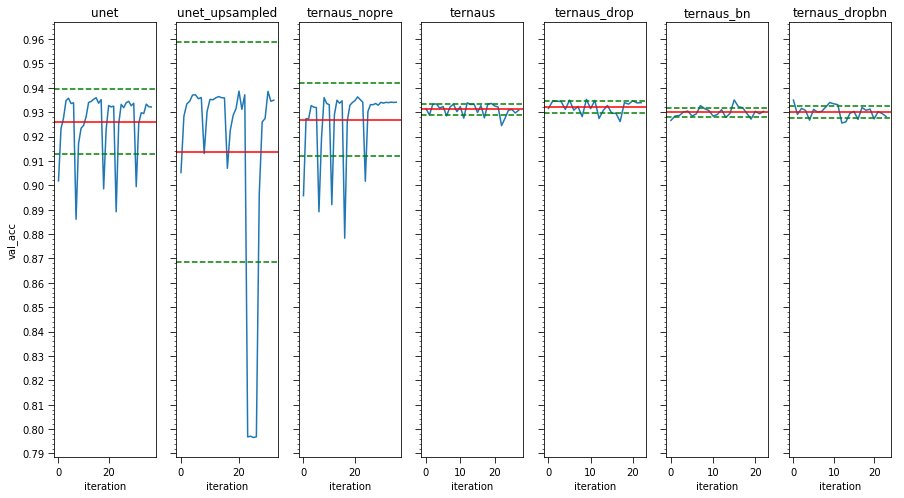

In [40]:
plt = plot(models[:-1], 'val_acc', '256px_250steps_20epochs')
plt.savefig(f'{assets_pth}/256px_250steps_20epochs_nopix2pix.jpg', format='jpg', 
            quality=90)
plt.show()

In [57]:
results = []
for model in models:
    experiment_suffix = '256px_250steps_20epochs'
    df = pd.read_csv(f'{results_pth}/{model[0]}_{experiment_suffix}.csv')
    mean, std = mean_std(df, 'val_acc')
    results.append([model[0], np.around(mean, 4), np.around(std, 4)])

In [59]:
df = pd.DataFrame(np.asarray(results), columns=['model', 'mean validation acc.', 'std validation acc.'])
df

,model,mean validation acc.,std validation acc.
0,unet_baseline,0.9261,0.0132
1,unet_baseline_upsampled,0.9136,0.0452
2,unet_ternaus_nopre,0.927,0.0149
3,unet_ternaus,0.9312,0.0024
4,unet_ternaus_drop,0.9322,0.0026
5,unet_ternaus_bn,0.93,0.0019
6,unet_ternaus_dropbn,0.9302,0.0025
7,unet_pix2pix,0.8218,0.1331


# Experiment C – Analysis

## Fast test – 50 training steps

Comparison of validation set accuracy for each model after only 50 training steps. Each experiment is repeated for 20 iterations to allow estimate of mean and variance of model performance. 

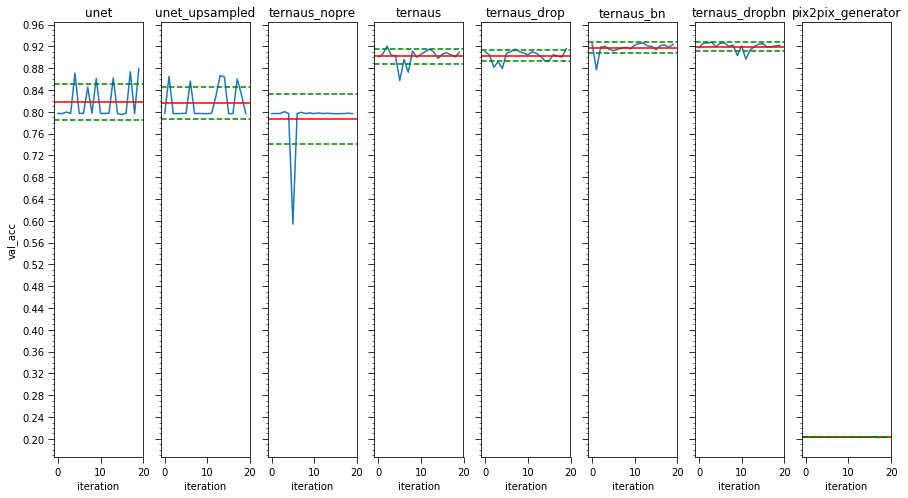

In [26]:
plt = plot(models, 'val_acc', '256px_50steps')
plt.savefig(f'{assets_pth}/256px_50steps.jpg', format='jpg', quality=90)
plt.show()